In [ ]:
# We are now going to look at the acceleration value and how it compares with our
# value computed from the position given by the orientation

In [4]:
fdir = "../hanglog/mild_swinging"

import os, sys
sys.path.append("..")
import hacktrack.loaders
import pandas, numpy, math
import scipy.optimize
from matplotlib import pyplot as plt
from hacktrack import loaders, utils
from hacktrack.utils import qvec, qmult, InterpT, curvefitdifferentiate
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

logfiles = os.listdir(fdir)
print(logfiles)
fLog = os.path.join(fdir, logfiles[0])
fd = loaders.FlyDat(fLog)
fd.LoadC("ZY")

# assign timevalues in seconds to these tables
fd.pY["t"] = (fd.pY.index - fd.t0)/pandas.Timedelta(seconds=1)
fd.pZ["t"] = (fd.pZ.index - fd.t0)/pandas.Timedelta(seconds=1)

# filter the spikes
Z0 = fd.pY[~fd.pY.bad]
Z1 = fd.pZ[~fd.pZ.bad]


t0 = fd.t0 + pandas.Timedelta(seconds=2)
t1 = t0 + pandas.Timedelta(seconds=38)
A = Z1[t0:t1]

['hdata-2021-01-05_19-24-22.log']
Extracting knowndate from filename: 2021-01-05
E:1, Y:17596, Z:17374, aF:1009, aZ:1026, aA:1026
linAdifftime 28119431.929856114 count 1112
Made for Q 0 last index 0
Made for V 0 last index 0
Loading aQV as no pQV records
Made for aQ 0 last index 0
Made for aV 0 last index 0
Missing GPS data, so setting t0 to 2021-01-05 19:22:58.029930
Made for Z 17374 last index 17374
Warning, using guessed (not GPS) timing corrected value on Z 17374
pCattrname pZ
Made for Y 17596 last index 17596
Warning, using guessed (not GPS) timing corrected value on Y 17596
pCattrname pY


In [31]:
t0 = fd.t0 + pandas.Timedelta(seconds=2)
t1 = t0 + pandas.Timedelta(seconds=58)
A = Z1[t0:t1]

In [32]:
a = qvec((A.q0, -A.q1, -A.q2, -A.q3), (A.gx,A.gy,A.gz))
combinedacc = qvec((A.q0, -A.q1, -A.q2, -A.q3), (A.gx+A.ax,A.gy+A.ay,A.gz+A.az))
pendleng = 0.15
pendposition = qvec((A.q0, -A.q1, -A.q2, -A.q3), (0,0,pendleng))
cfdt = 0.18
px0, px1, px2 = curvefitdifferentiate(pendposition[0], cfdt)
py0, py1, py2 = curvefitdifferentiate(pendposition[1], cfdt)
pz0, pz1, pz2 = curvefitdifferentiate(pendposition[2], cfdt)

graph on right should be zero.  failure proves a failure of the curvefitdifferentiate theory


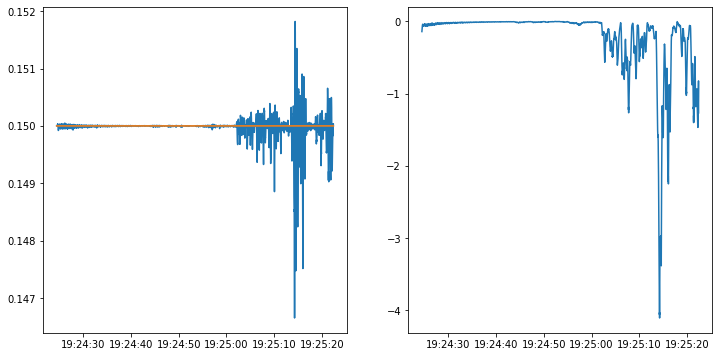

In [39]:
# acceleration from pendulum position in line with pendulum should be zero
plt.figure(figsize=(12,6))
plt.subplot(121)
plt.plot(numpy.sqrt(px0**2 + py0**2 + pz0**2))
plt.plot(numpy.sqrt(pendposition[0]**2 + pendposition[1]**2 + pendposition[2]**2))
plt.subplot(122)
pendpendacc = (px2*px0 + py2*py0 + pz2*pz0)/pendleng
plt.plot(pendpendacc)
print("graph on right should be zero.  failure proves a failure of the curvefitdifferentiate theory")


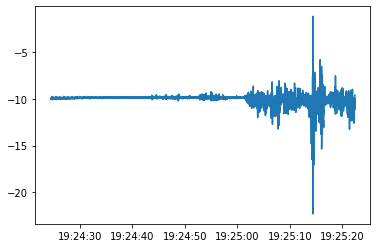

In [37]:
plt.plot(cdotp)

If any of this theory were right, these three graphs should lie on the X=Y line


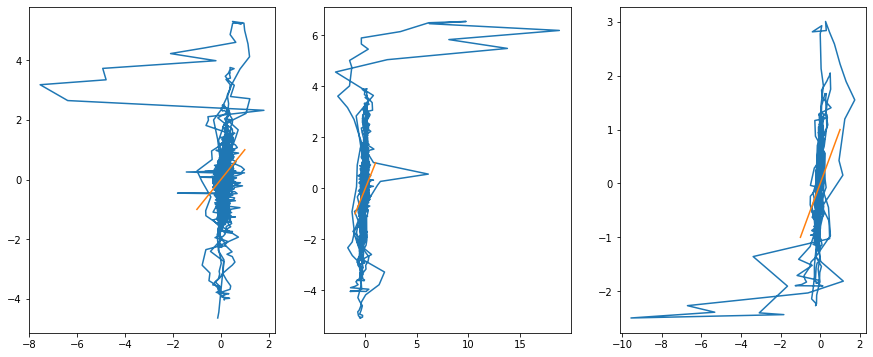

In [38]:
# if we subtract the along pendulum vector from the absolute acceleration it 
# should match this absolute combined acceleration vector
combinedacc = qvec((A.q0, -A.q1, -A.q2, -A.q3), (A.gx+A.ax,A.gy+A.ay,A.gz+A.az))
cdotp = (combinedacc[0]*px0 + combinedacc[1]*py0 + combinedacc[2]*pz0)/pendleng
combinedaccperp = (combinedacc[0] - cdotp*px0/pendleng, 
                   combinedacc[1] - cdotp*py0/pendleng, 
                   combinedacc[2] - cdotp*pz0/pendleng)
plt.figure(figsize=(15,6))
plt.subplot(131)
plt.plot(combinedaccperp[0], px2)
plt.plot((-1,1), (-1,1))
plt.subplot(132)
plt.plot(combinedaccperp[1], py2)
plt.plot((-1,1), (-1,1))
plt.subplot(133)
plt.plot(combinedaccperp[2], pz2)
plt.plot((-1,1), (-1,1))
print("If any of this theory were right, these three graphs should lie on the X=Y line")

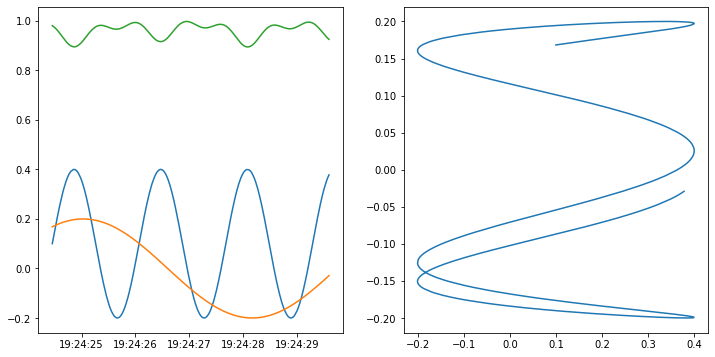

In [56]:
timeindex = py1.iloc[:400].index
tt = (timeindex - timeindex[0])/pandas.Timedelta(seconds=1)
sx = pandas.Series(numpy.sin(tt*3.9)*0.3+0.1, timeindex)
sy = pandas.Series(numpy.sin(tt+1)*0.2, timeindex)
sz = numpy.sqrt(1-sx**2-sy**2)
plt.figure(figsize=(12,6))
plt.subplot(121)
plt.plot(sx)
plt.plot(sy)
plt.plot(sz)
plt.subplot(122)
plt.plot(sx, sy)

The velocity is in the plane, however the acceleration is not in the plane!
This is because we are moving around a curve inwards so the acceleration cannot be tangent to the sphere


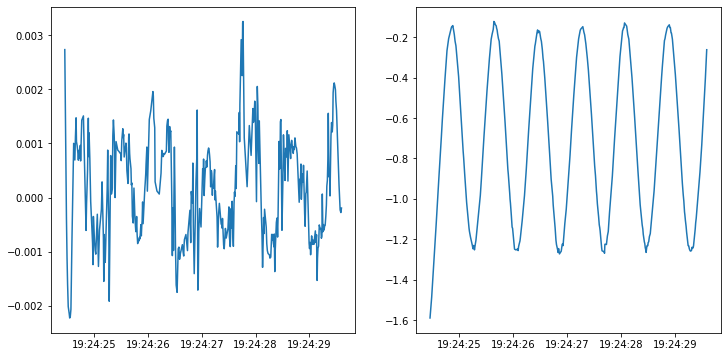

In [60]:
sx0, sx1, sx2 = curvefitdifferentiate(sx, cfdt)
sy0, sy1, sy2 = curvefitdifferentiate(sy, cfdt)
sz0, sz1, sz2 = curvefitdifferentiate(sz, cfdt)
pendpendvelocity = sx0*sx1 + sy0*sy1 + sz0*sz1
#plt.plot(sx0)
#plt.plot(sy0)
#plt.plot(sz0)
plt.figure(figsize=(12,6))
plt.subplot(121)
plt.plot(pendpendvelocity)
plt.subplot(122)
pendpendacceleration = sx0*sx2 + sy0*sy2 + sz0*sz2
plt.plot(pendpendacceleration)
print("The velocity is in the plane, however the acceleration is not in the plane!")
print("This is because we are moving around a curve inwards so the acceleration cannot be tangent to the sphere")